<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-для-работы" data-toc-modified-id="Импорт-библиотек-для-работы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек для работы</a></span></li><li><span><a href="#Импорт-исходных-данных" data-toc-modified-id="Импорт-исходных-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Импорт исходных данных</a></span></li><li><span><a href="#Подготовка-временного-ряда" data-toc-modified-id="Подготовка-временного-ряда-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка временного ряда</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-сезонности" data-toc-modified-id="Анализ-сезонности-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ сезонности</a></span></li><li><span><a href="#Анализ-скользящего-среднего" data-toc-modified-id="Анализ-скользящего-среднего-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ скользящего среднего</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Dummy-Model" data-toc-modified-id="Dummy-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dummy Model</a></span></li><li><span><a href="#Финальное-тестирование-модели-линейной-регрессии" data-toc-modified-id="Финальное-тестирование-модели-линейной-регрессии-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Финальное тестирование модели линейной регрессии</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Необходимо:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

**Описание данных**

Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек для работы

In [1]:
pip install arch

     |████████████████████████████████| 918 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.contrib.itertools import product

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from arch.unitroot import ADF

plt.rcParams["figure.figsize"] = (10,5)

In [3]:
RANDOM_STATE = 12345

### Импорт исходных данных

In [4]:
# загрузим таблицу с исходными данными

try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    # загрузка данных с сервера Яндекса

In [5]:
# посмотрим на данные
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Данные импортировались корректно.

### Подготовка временного ряда

In [7]:
# отсортируем данные по дате и проверим монотонность
data.sort_index(inplace=True)
data.index.is_monotonic

True

In [8]:
# ресемплируем данные по одному часу
data = data.resample('1H').sum()

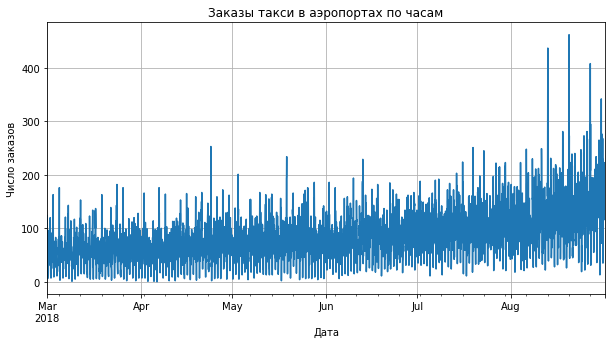

In [9]:
# посмотрим на получившийся временной ряд
data.plot(legend=False, grid=True)
plt.title('Заказы такси в аэропортах по часам')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

Как можно заметить из графика, ряд очень медленно возрастает. Значения сначала преимущественно колеблются в диапазоне 0-100, затем постепенно среднее увеличивается и, во-первых, нижняя и верхние границы колебаний смещаются, а во-вторых, сам диапазон увеличивается (значения под конец временного периода уже около 30-300).

**Вывод:**<br/>
Таким образом, мы импортировали исходные данные, проверили их на монотонность, а также провели ресемплинг по часам. Можно приступать к анализу данных.

## Анализ

### Анализ сезонности

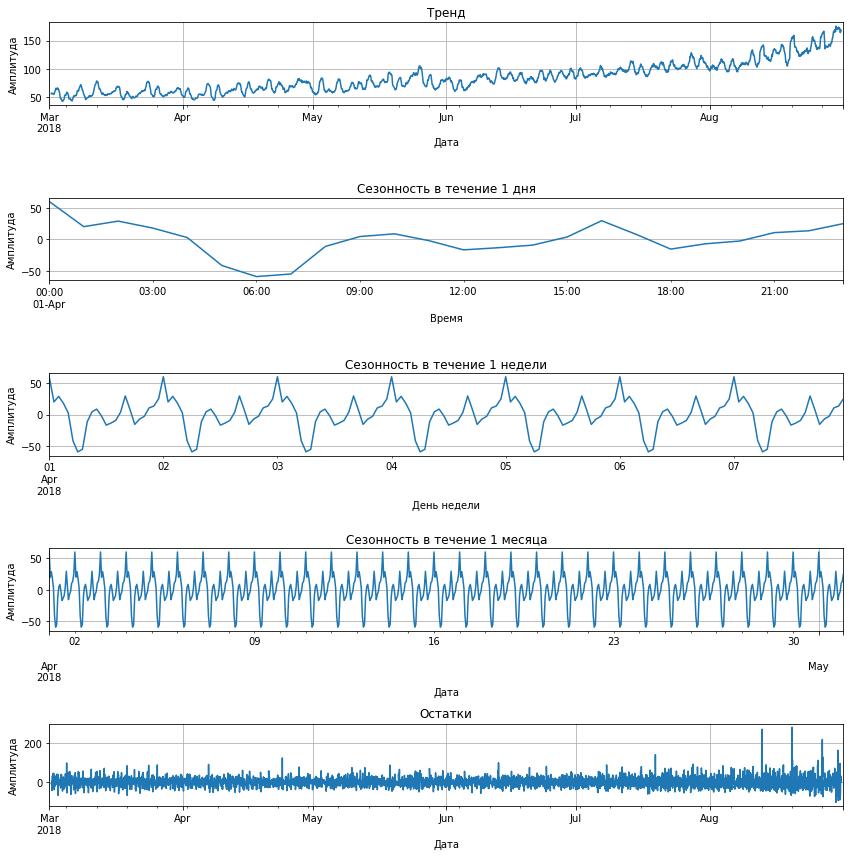

In [13]:
# разложим ряд на сезонную составляющую, тренд и остатки
decomposed = seasonal_decompose(data)

plt.figure(figsize=(12,12))

# посмотрим на тренд
plt.subplot(511)
decomposed.trend.plot(ax=plt.gca(), grid=True)
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

# посмотрим на сезонность в течение разных периодов: 1 дня, 1 недели, 1 месяца

# посмотрим на сезонность в течение 1 дня
plt.subplot(512)
decomposed.seasonal['2018-04-01':'2018-04-01'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность в течение 1 дня') 
plt.xlabel('Время')
plt.ylabel('Амплитуда')

# посмотрим на сезонность в течение 1 недели 
plt.subplot(513)
decomposed.seasonal['2018-04-01':'2018-04-07'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность в течение 1 недели') 
plt.xlabel('День недели')
plt.ylabel('Амплитуда')

# посмотрим на сезонность в течение 1 месяца
plt.subplot(514)
decomposed.seasonal['2018-04-01':'2018-05-01'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность в течение 1 месяца') 
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

# посмотрим на остатки
plt.subplot(515)
decomposed.resid.plot(ax=plt.gca(), grid=True)
plt.title('Остатки')
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

plt.tight_layout()

Если посмотреть на тренд, мы видим, что в целом число заказов в такси за весь период постепенно возрастало.

Что касается анализа сезонности, наблюдается следующее: <br/>
В течение 1 дня ночью большое число заказов, до 6 утра спад, с 6 утра до 16 часов плавное увеличение с колебаниями, затем спад до 18 часов и затем снова подъем до ночи. Такая тенденция наблюдается каждый день на протяжении недель и месяцов, что говорит о том, что присутствует сезонность в течение дня. 

Можно предположить, что эти колебания вызваны графиками прилета и отлета самолетов: скорее всего оно примерно одинаковое по дням и многие рейсы вылетают и прибывают в ночное время суток, затем в течение дня рейсов меньше. 

Кажется, что в рамках недели и месяца изменений не наблюдается. Посмотрим на данные повнимательнее и проверим это.

In [11]:
# выполним ресемплирование по дням
data_daily = data.resample('1D').sum()

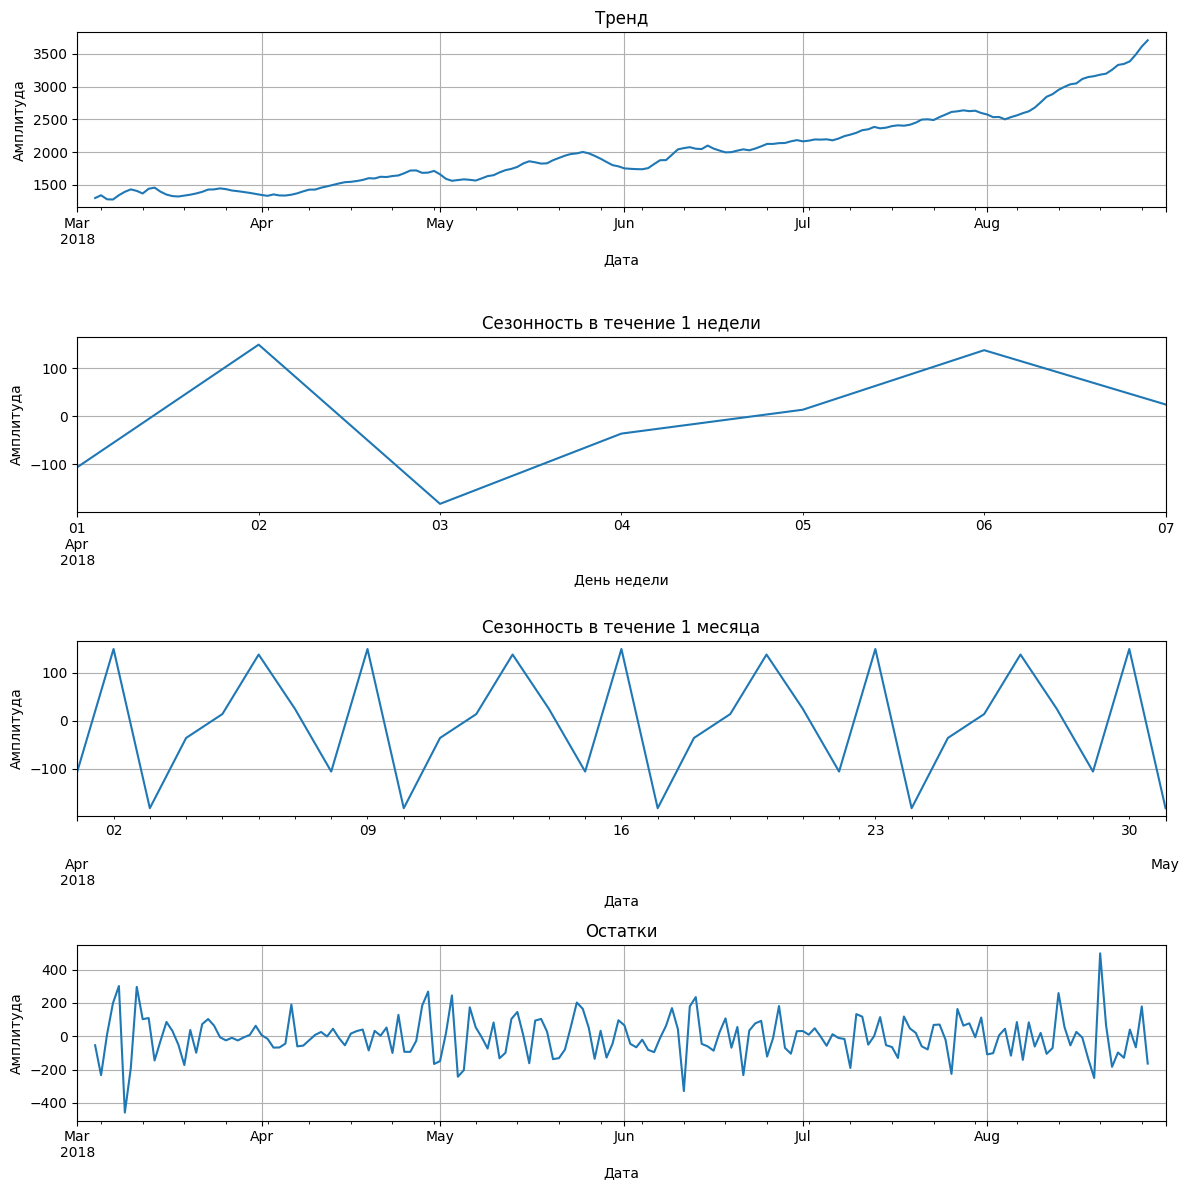

In [12]:
# разложим ряд на сезонную составляющую, тренд и остатки
decomposed_daily = seasonal_decompose(data_daily)

plt.figure(figsize=(12,12))

# посмотрим на тренд
plt.subplot(411)
decomposed_daily.trend.plot(ax=plt.gca(), grid=True)
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

# посмотрим на сезонность в течение 1 недели и 1 месяца

# посмотрим на сезонность в течение 1 недели 
plt.subplot(412)
decomposed_daily.seasonal['2018-04-01':'2018-04-07'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность в течение 1 недели') 
plt.xlabel('День недели')
plt.ylabel('Амплитуда')

# посмотрим на сезонность в течение 1 месяца
plt.subplot(413)
decomposed_daily.seasonal['2018-04-01':'2018-05-01'].plot(ax=plt.gca(), grid=True)
plt.title('Сезонность в течение 1 месяца') 
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

# посмотрим на остатки
plt.subplot(414)
decomposed_daily.resid.plot(ax=plt.gca(), grid=True)
plt.title('Остатки')
plt.xlabel('Дата')
plt.ylabel('Амплитуда')

plt.tight_layout()

Из графиков "Сезонность в течение 1 недели" и "Сезонность в течение 1 месяца" можно увидеть, что присутствует сезонность по дням недели. 1 августа 2018 г. было средой, исходя из чего можно увидеть следующее:
1. Наибольший спрос на такси наблюдается по четвергам и понедельникам.
2. В пятницу спрос наименьший.
3. С пятницы по понедельник происходит постепенный рост спроса.

Это всё можно опять же объяснить графиками авиаперелетов из аэропорта конкретного города: скорее всего расписание составлено так, что больше всего авиаперелетов совершается по четвергам и понедельникам, в то время как в пятницу число вылетов наименьшее.

В целом сам график авиаперелетов уже зачастую связан со стоимостью транзита для авиакомпаний в аэропорту.

Что касается остаткой исходного ряда (ресемплированного по часам), то можно сказать, что остатки похожи на белый шум, однако ближе к концу периода (после августа) колебания увеличиваются, похоже на то, что стандартное отклонение растет. Скорее всего ряд стационарен в связи с тем, что остатки в общем и целом ведут себя стабильно.

### Анализ скользящего среднего

Вернемся к исходному ряду и проанализируем скользящее среднее.

In [13]:
# применим скользящее среднее, найдем скользящее стандартное отклонение
# будем сглаживать по неделям: 24 часа * 7 дней = 168 часов 

data['rolling_mean'] = data.rolling(168, closed='left').mean()
data['rolling_std'] = data['num_orders'].rolling(168, closed='left').std()

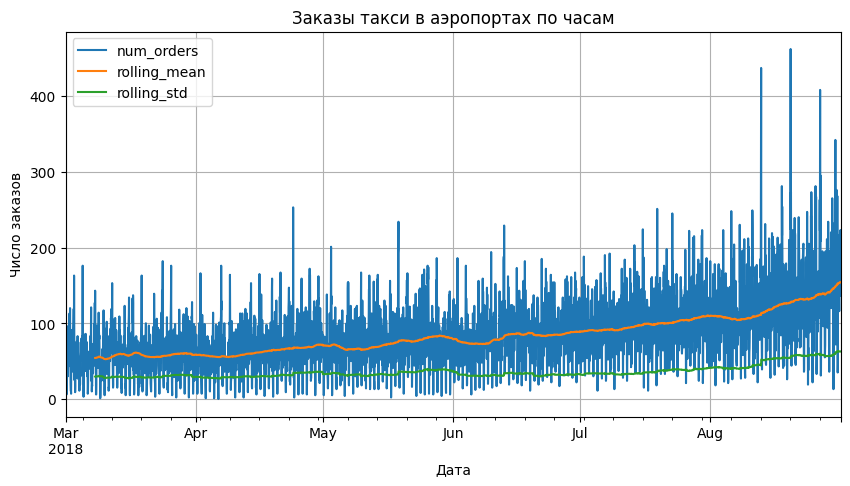

In [14]:
# визуализируем всё вместе
data.plot(grid=True)
plt.title('Заказы такси в аэропортах по часам')
plt.xlabel('Дата')
plt.ylabel('Число заказов')

plt.show()

По графику мы можем убедиться в том, что наблюдается тренд: среднее число заказов постепенно растет (что было видно на графике декомпозиции - тренда), а стандартное отклонение со временем немного увеличивается (что было видно на графике декомпозиции - остатков). 

Проверим ряд на стационарность. Для этого проведем ADF тест:
```
H0: ряд DS (ряд разностно-стационарный, т.е. сам ряд не стационарен)
H1: ряд TS (тренд-стационарный, т.е. сам ряд стационарен)
```
`p-value` - вероятность ошибиться, отвергнув H0. <br/>
Т.о. если `p-value > alpha`, то мы не отвергаем H0 (ряд нестационарный). Если `p-value < alpha`, то мы можем отвергнуть H0 (ряд стационарный).


In [15]:
# будем проводить тест с константой
print(ADF(data['num_orders'], trend='c'))

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.069
P-value                         0.029
Lags                               30
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


`p-value = 0.029`, что меньше уровня значимости `alpha = 0.05`, значит мы отвергаем нулевую гипотезу: отвергается Н0 о DS-характере ряда. Т.о., ряд оказаляс стационарным.

**Вывод**: <br/>

В данном разделе мы проверили данные на наличие сезонности и убедились в том, что присутствует сезонность по часам в течение дня, а также сезонность по дням недели. Также мы убедились в том, что в данных присутствует тренд. Мы также проверили ряд на стационарность и убедились в его стационарности.

## Обучение

### Подготовка признаков

In [16]:
# удалим добавленные ранее признаки, т.к. они не будут использоваться в моделях

data = data.drop(columns=['rolling_mean', 'rolling_std'])

In [17]:
# добавим функцию, которая будет создавать копию датасета, в которой будут добавлены новые признаки:

def make_features(data, max_lag, rolling_mean_size):
    
    new_df = data.copy()
    
    new_df['day'] = new_df.index.day
    new_df['dayofweek'] = new_df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        new_df['lag_{}'.format(lag)] = new_df['num_orders'].shift(lag)

    new_df['rolling_mean'] = new_df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return new_df

In [18]:
# добавим функцию разбиения на выборки для датасета

def create_samples(data):
    
    # разделим данные на обучающую, валидационную и тестовую выборки в отношении 80:10:10

    # разделим на трейн и тест в отношении 90:10
    train, test = train_test_split(data, shuffle=False, test_size=0.1)
    # разделим трейн на валидационную и обучающую: 0.9 * 1/9 = 0.1  
    train, valid = train_test_split(train, shuffle=False, test_size=1/9)
    
    # удалим пропуски из обучающей выборки
    train = train.dropna()
    
    return train, valid, test

In [19]:
# добавим функцию, которая будет создавать таргет и фичи для выборки

def target_and_features(data):
    
    target = data['num_orders']
    features = data.drop(columns='num_orders')
    
    return features, target

Будем заносить результаты в следующую таблицу:

In [20]:
results = pd.DataFrame(columns=['rmse', 'max_lag', 'best_rolling_mean_size', 'max_depth', 'n_estimators'],
                      index=['linear', 'decision_tree', 'random_forest'])

### Linear Regression

In [21]:
best_max_lag = 0
best_rolling_mean_size = 0
best_rmse = 1e10

for max_lag, rolling_mean_size in product(range(1, 25), range(1, 25)):
    
    new_df = make_features(data, max_lag, rolling_mean_size)
    train, valid, test = create_samples(new_df)
    features_train, target_train = target_and_features(train)
    features_valid, target_valid = target_and_features(valid)
    
    model = LinearRegression()
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse_result = mse(predictions, target_valid, squared=False)
    if best_rmse > rmse_result:
        best_model = model
        best_max_lag = max_lag
        best_rolling_mean_size = rolling_mean_size
        best_rmse = rmse_result
        
print(f'Параметры make_features:{(best_max_lag, best_rolling_mean_size)}.')
print(f'Лучший RMSE = {best_rmse}')

  0%|          | 0/576 [00:00<?, ?it/s]

Параметры make_features:(24, 3).
Лучший RMSE = 34.23361271339788


In [22]:
results.loc['linear', 'rmse'] = best_rmse
results.loc['linear', 'max_lag'] = best_max_lag
results.loc['linear', 'best_rolling_mean_size'] = best_rolling_mean_size

### Decision Tree

In [23]:
best_model = None
best_max_lag = 0
best_rolling_mean_size = 0
best_rmse = 1e10

for max_lag, rolling_mean_size, depth in product(range(1, 25), range(1, 25), range(1, 10)):
    
    new_df = make_features(data, max_lag, rolling_mean_size)
    train, valid, test = create_samples(new_df)
    features_train, target_train = target_and_features(train)
    features_valid, target_valid = target_and_features(valid)
    
    model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=depth)
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse_result = mse(predictions, target_valid, squared=False)
    if best_rmse > rmse_result:
        best_model = model
        best_max_lag = max_lag
        best_rolling_mean_size = rolling_mean_size
        best_rmse = rmse_result
        
print(f'Лучшая модель: {best_model}.')
print(f'Параметры make_features:{(best_max_lag, best_rolling_mean_size)}.')
print(f'Лучший RMSE = {best_rmse}')

  0%|          | 0/5184 [00:00<?, ?it/s]

Лучшая модель: DecisionTreeRegressor(max_depth=8, random_state=12345).
Параметры make_features:(24, 8).
Лучший RMSE = 36.57504942756432


In [24]:
results.loc['decision_tree', 'rmse'] = best_rmse
results.loc['decision_tree', 'max_lag'] = best_max_lag
results.loc['decision_tree', 'best_rolling_mean_size'] = best_rolling_mean_size
results.loc['decision_tree', 'max_depth'] = best_model.get_params()['max_depth']

### Random Forest

In [25]:
best_model = None
best_max_lag = 24
best_rolling_mean_size = 0
best_rmse = 1e10
best_n_est = 0

for rolling_mean_size, depth, est in product(range(1, 10), range(1, 10), range(1, 51, 10)):
    
    new_df = make_features(data, best_max_lag, rolling_mean_size)
    train, valid, test = create_samples(new_df)
    features_train, target_train = target_and_features(train)
    features_valid, target_valid = target_and_features(valid)
    
    model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=depth, n_estimators=est)
    
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    rmse_result = mse(predictions, target_valid, squared=False)
    if best_rmse > rmse_result:
        best_model = model
        best_rolling_mean_size = rolling_mean_size
        best_rmse = rmse_result
        best_n_est = est
        
print(f'Лучшая модель: {best_model}.')
print(f'Параметры make_features:{(best_max_lag, best_rolling_mean_size)}.')
print(f'Лучший RMSE = {best_rmse}')

  0%|          | 0/405 [00:00<?, ?it/s]

Лучшая модель: RandomForestRegressor(max_depth=9, n_estimators=31, random_state=12345).
Параметры make_features:(24, 9).
Лучший RMSE = 33.84910022092306


In [26]:
results.loc['random_forest', 'rmse'] = best_rmse
results.loc['random_forest', 'max_lag'] = best_max_lag
results.loc['random_forest', 'best_rolling_mean_size'] = best_rolling_mean_size
results.loc['random_forest', 'max_depth'] = best_model.get_params()['max_depth']
results.loc['random_forest', 'n_estimators'] = best_model.get_params()['n_estimators']

### Выбор лучшей модели

In [27]:
results.sort_values(by='rmse')

,rmse,max_lag,best_rolling_mean_size,max_depth,n_estimators
random_forest,33.8491,24,9,9,31
linear,34.233613,24,3,NaN,NaN
decision_tree,36.575049,24,8,8,NaN


**Вывод**: <br/>
Таким образом, в данном разделе мы построили три модели для прогнозирования спроса на такси по часам. Необходимо было, чтобы RMSE модели был ниже 48. Все модели показали RMSE лучше бейзлайна. Наилучшие результаты удалось достичь на модели случайного леса. Однако учитывая то, что, во-первых, мы ранее обнаружили, что в данных **присутствует тренд** (и более поздние данные попали в валидационную и тестовую выборки), а, во-вторых, то, что **разница между RMSE линейной регрессии и RMSE случайного леса крайне мала (меньше 0.5)**, будем моделировать на линейной регрессии.

## Тестирование

### Dummy Model

In [28]:
# проверим насколько хорошая дамми модель, чтобы сравнить с ней финальные результаты
train, valid, test = create_samples(data)
features_train, target_train = target_and_features(train)
features_test, target_test = target_and_features(test)

pred_median = np.ones(test.shape) * train['num_orders'].median()

mse(pred_median, target_test, squared=False)

89.39768286346948

### Финальное тестирование модели линейной регрессии

In [29]:
max_lag = results.loc['linear', 'max_lag']
rolling_mean_size = results.loc['linear', 'best_rolling_mean_size']

new_df = make_features(data, max_lag, rolling_mean_size)
train, valid, test = create_samples(new_df)
features_train, target_train = target_and_features(train)
features_test, target_test = target_and_features(test)
    
model = LinearRegression()
    
model.fit(features_train, target_train)
predictions = model.predict(features_test)

# выведем RMSE финальной модели
mse(predictions, target_test, squared=False)

45.333379419930985

**Вывод**:<br/>

Модель линейной регрессии на финальном тестировании показала RMSE ниже 48, значит тест пройден успешно - модель была подобрана правильно.

In [30]:
predictions = pd.Series(predictions, index=target_test.index)

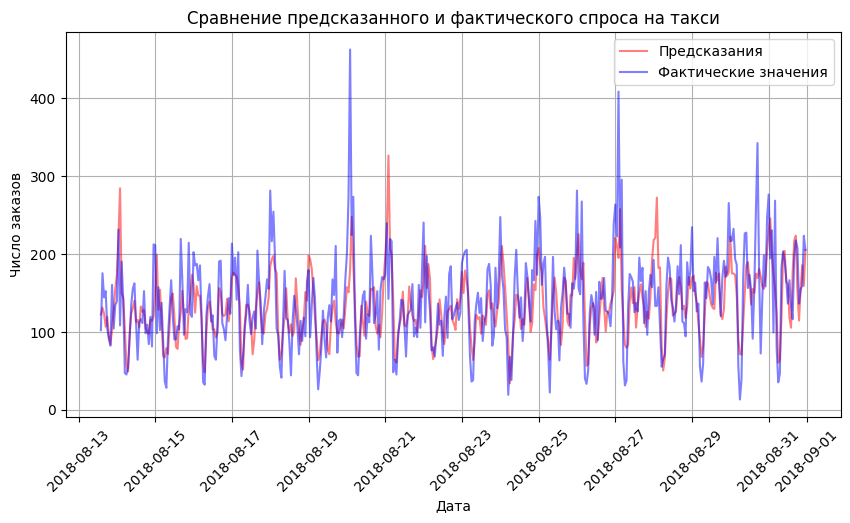

In [31]:
# визуализируем факт и прогноз
plt.figure()
plt.plot(predictions, color='red', label='Предсказания', alpha=0.5) 
plt.plot(target_test, color='blue', label='Фактические значения', alpha=0.5) 
plt.title('Сравнение предсказанного и фактического спроса на такси') 
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Из графика можно заметить, что значения действительно вышлип достаточно похожими и мы неплохо смогли предсказать спрос на такси.

## Общий вывод

В рамках данного проекта перед нами стояла задача спрогнозировать количество заказов такси на следующий час. Для достижения задачи было выполнено следующее:
- Подготовка временного ряда к анализу. Мы импортировали данные, проверили сортировку и провели ресемплирование данных по часам с суммированием числа заказов.
- Анализ сезонности и скользящего среднего. Мы проверили наличие сезонности и тренда и обнаружили сезонность по часам, а также по дням недели. Мы также проверили ряд на стационарность и убедились в его стационарности.
- Построили три модели для прогнозирования числа заказов: линейную регрессию, дерево решений и случайный лес. Для каждой модели подбирались наилучшие фичи и гиперпараметры.
- Проанализировали результаты обучения. Все модели дали RMSE ниже бейзлайна в 48. Наименьший RMSE достигался на валидационной выборке в модели случайного леса, однако, учтя наличие тренда и совсем незначительное различие в RMSE линейной регрессии и случайного леса (меньше 0.25), мы выбрали в качестве основной модели для финального тестирования линейную регрессию.
- Провели финальное тестирование модели. RMSE на финальном тестировании составил `45.33`, что также меньше требуемых `48`. Также модель показала лучшую прогнозную способность в сравнении с дамми моделью, что говорит о её адекватности.

Таким образом, нам удалось подобрать модель для прогнозирования числа заказов такси - наилучшей моделью стала `линейная регрессия`, дающая RMSE = `45.33`.